# Lecture 17 (5/4/2022)

**Announcements**
- Purva OH in ERCA 117 after W lab for rest of quarter! 


*Last time we covered:*
- Prediction: regression + overfitting

**Today's agenda:**
- Classification part I


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classification

## Overview

Classification is a hugely influential and broad area of machine learning research and data science applications. It's also at the heart of some of the biggest controversies in AI ethics. 

We're going to spend the rest of this week and most of next week discussing different aspects of classification. By the end of next week, you should get a good sense of: 
- What classification algorithms are out there and how they work (high-level) 
- How to evaluate them
- How to implement (and evaluate) them in python
- What kind of issues arise when using them

At a high level, **classification algorithms are concerned with identifying discrete/categorical labels** based on patterns in our data. This contrasts with regression which has a goal of predicting a continuous numerical value rather than a categorical one (though as we'll see, this line gets blurred). 

The goal for a classification algorithm is to be able to **take in data** like a text document, a photo, or more structured data about items in the world and **return a label** for that data (what's in the photo, who wrote the document, etc.). A *successful* classification algorithm should be:
- *Data-driven* (i.e., the goal is to make these predictions with as little human intervention as possible)
- *Accurate* with data the algorithm has never seen before 
- *Fair* in the labels that it suggests (this last one is of particular importance as these algorithms become more widespread)

There are many different classification algorithms out there; we're going to cover some of the most common and well-known ones which will give you a good intuition for how they work and how to think about other solutions you encounter in the future. 

## Structure

Classification (like regression) is a **supervised** learning problem: the goal is to detect patterns in an existing set of data that will help us make predictions or generalize to new data.

In the case of classification, our data is a set of *labeled examples* $(X, y)$. 
- The *label* $y$ is the category that the example belongs to: this is what we want to predict 
    - ex. whether a passenger survived the Titanic (Y/N)
- Each labeled example has a set of *features* $X$ which are numerical variables we use to try and predict that example's label. 
    - ex. how much the passenger paid for their ticket ($x_1$), how old they were ($x_2$), etc.

Each row in our data is a single labeled example, with columns corresponding to the features and the label. 

| $x_1$ (feature) | $x_2$ (feature) | $x_3$ (feature) | $y$ (label) |
| ---- | ------ | -------------- | ------------ |
| $a_1$ | $a_2$ | $a_3$ | $a_y$ |
| $b_1$ | $b_2$ | $b_3$ | $b_y$ |
| ... | ... | ... | ... |

**The goal of classification algorithms is to identify patterns in the relationship between features and labels in our training data that will allow us to predict the label of a *new* example, given its features.**



## Examples

Broadly, classification algorithms fall into two broad categories (plus a couple other less common ones).

We'll walk through a definition and examples of each of the classification types below:

- *Binary* classification
- *Multiclass* classification
- Other: *one-class*, *multi-label*

### Binary classification

**Goal**: Use the features of the training data to accurately classify a *binary* outcome or variable in the data.

**Examples**
- Canonical computer science problem: use the text of an email to predict whether it's spam
- Modern CAPTCHA problems: use the pixels of an image to detect the presence or absence of certain objects
- Common data science teaching problem: use titanic passenger info to predict who survived
- Social science example: use prior voting history and survey information to predict whether somebody is a likely voter

**Why this matters**

In addition to the examples above, binary classification models can also be used for highly consequential decisions. Consider a model that uses information about loan applicants (credit score, employment) to decide whether they are likely to repay a loan. Or, the real-world example below:


![recidivism_classifier](img/recidivism.png)
([source](https://www.technologyreview.com/2019/01/21/137783/algorithms-criminal-justice-ai/), see also [here](https://www.nytimes.com/2020/02/06/technology/predictive-algorithms-crime.html))

### Multiclass classification



**Goal**: Use the features of the training data to accurately classify a variable or outcome into *more than two* possible values.

**Examples**
- Common data science problem: use the pixels of an image to determine the *number* shown in the image (MNIST dataset)
- Social science: use the text of a document to determine its author or other important information about it

![mnist](img/mnist.png)
The *MNIST* dataset is a popular dataset for image-based classification ([source](https://en.wikipedia.org/wiki/MNIST_database))

**Why this matters**

One domain that you might not think of as a "classification problem" is face recognition. Here, the training data is prior photos of a person and the label is that person's identity. Deep learning classification approaches can be very effective at face recognition, raising serious ethical issues for its use in AI and governance (see below). 

![fb](img/fb.png)

([source](https://www.nytimes.com/2021/11/02/technology/facebook-facial-recognition.html))

### Other types of classification (less common)

We won't discuss these in detail but it's helpful to know they exist! 

**Multi-label classification**: Decide which among a set of multiple labels should be applied to a particular instance 
- *Does this image contain a cat? A person? A car? All the above?*

**One-class classification**: Try to optimally identify an instance of a single class 
- *Is this datapoint an outlier? Does this medical scan contain a tumor?*


## Intuitive solution: $k$-nearest neighbors (k-NN)

$k$-nearest neighbors (k-NN) is usually the place where people start with classification algorithms because the underlying logic is super intuitive (other ones we'll talk about are much less so). 

- How it works
- Implementing k-NN "by hand"
- `sklearn` implementation
- Try it out!

### How it works

The central idea with k-NN is that when you see a new data point that has features $\theta$ and an *unknown* label $\lambda$ that you're trying to identify, your best guess is to find the training items whose features ($x$) are *most similar* to $\theta$ and assume its label is the same as the majority of those "neighbors". 

It's kind of like the cafeteria in Mean Girls...

![mean_girls_cafeteria](img/mean_girls.jpeg)

*Birds of a feather flock together*: the k-NN classifier guesses an item's label based on whatever training data the item is *closest to*.


**Pseudo-code**

Steps for classifying a *new* example with features $\theta$ and *unknown* label $\lambda$ (more [here](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)):
1. Cycle through all data points with features $x_i$ and *known label* $y_i$.
2. For each known data point, calculate and store the *distance* from its features $x_i$ to our unknown data point's features $\theta$ (Note: this algorithm relies on a distance function $D(x_1, \theta)$)
3. After cycling through all known data points, select the $k$ data points whose features are the *shortest* distance to our unknown data point. These are the "nearest neighbors." We choose $k$ ahead of time!
4. Select an estimated label $\hat{\lambda}$ for our unknown data point that corresponds to the *most common label* $Y$ among the nearest data points from step 3.


![knn_wikipedia](img/knn.png)

In the image above, we're trying to guess a classification (*red triangle* or *blue square* for the green circle. The black outlines show our *nearest neighbors* for $k = 3$ and $k = 5$ ([source](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm))

Let's see what this looks like in practice!

### Implementing k-NN classification

To show how this works, we'll rely on the `iris` dataset, a popular dataset for illustrating classification.

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Let's look at whether petal length and petal width allow for straightforward k-NN classification:

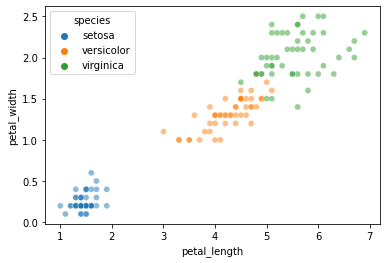

In [3]:
sns.scatterplot(data = iris, x = "petal_length", y = "petal_width", hue = "species", alpha = 0.5)
plt.show()

Now, our first step is to set aside some *test* data that we'll try to classify based on an available set of *training* data:

In [4]:
from sklearn.model_selection import train_test_split

x_vals = iris.loc[:, ('petal_length', 'petal_width')]
y_vals = iris.loc[:, 'species']

xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, 
                                                test_size = 0.1, # we'll use a small test set here
                                                random_state = 0 # make this process reproducible
                                               )
xtrain = xtrain.reset_index(drop = True)
xtest = xtest.reset_index(drop = True)
ytrain = ytrain.reset_index(drop = True)
ytest = ytest.reset_index(drop = True)

# Take a look at the train/test set
xtrain

,petal_length,petal_width
0,1.4,0.1
1,4.5,1.5
2,4.4,1.2
3,1.4,0.3
4,1.3,0.4
...,...,...
130,1.5,0.1
131,5.6,1.8
132,4.1,1.0
133,6.7,2.2


Here's a plot with our train and test data to see our sampled test points.

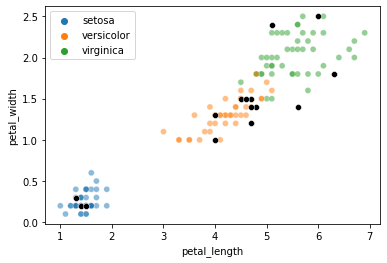

In [5]:
# Training data with label information
sns.scatterplot(data = xtrain,
                x = "petal_length",
                y = "petal_width",
                hue = ytrain,
                alpha = 0.5
               )
# Test data with label information obscured (black points)
sns.scatterplot(data = xtest,
                x = "petal_length",
                y = "petal_width",
                color = "k"
               )
plt.show()

For illustration, we'll just pick *one element from the test set above* to try and classify:

In [6]:
test_x = xtest.iloc[8, :]
test_x

petal_length    4.8
petal_width     1.4
Name: 8, dtype: float64

Where do this element's features sit in the training data? 

In other words, how is it likely to be classified?

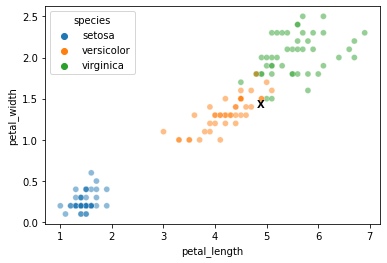

In [7]:
sns.scatterplot(data = xtrain, x = "petal_length", y = "petal_width", hue = ytrain, alpha = 0.5)
plt.text(s = "X", x = test_x[0], y = test_x[1], horizontalalignment = 'left', weight = 'bold')
plt.show()

**Now, can we classify the element labeled with the X above?**

First, we need a way to measure its distance to all the training datapoints.

For this, we'll use the *Euclidean distance between feature values*, but other approaches work as well.

Here's an illustration of the distance between our test point $X$ and a sample training point $\alpha$:

![knn_distance](img/knn_dist.png)

We need to calculate the distance between $X$ and *all the other data points in our training set*:

In [8]:
xtrain['distance'] = np.sqrt((xtrain['petal_length'] - test_x[0])**2 + (xtrain['petal_width'] - test_x[1])**2)
xtrain

,petal_length,petal_width,distance
0,1.4,0.1,3.640055
1,4.5,1.5,0.316228
2,4.4,1.2,0.447214
3,1.4,0.3,3.573514
4,1.3,0.4,3.640055
...,...,...,...
130,1.5,0.1,3.546830
131,5.6,1.8,0.894427
132,4.1,1.0,0.806226
133,6.7,2.2,2.061553


Now, our job is to find the "nearest neighbors": the $k$ elements from our training data that are the shortest distance from our unknown test item $X$.

First, we set a value for $k$ (we can choose any value here), then find the $k$-nearest neighbors. 

In [9]:
# Set our k value
k = 3

# What are the k values with the smallest distances to X?
xtrain.nsmallest(n = k, columns = 'distance', keep = "all")


,petal_length,petal_width,distance
43,4.7,1.4,0.100000
59,4.9,1.5,0.141421
117,4.9,1.5,0.141421


Now, we look at the labels for the $k$-nearest neighbors. 

In essence, the neighbors will "vote" on the likely label for our new datapoint $X$. 

Our estimated label $\hat{y}$ for $X$ will be the *mode* of the labels $Y$ of our $k$-nearest neighbors above.

In [10]:
# What are the labels of these nearest neighbor items?
ytrain.iloc[list(xtrain.nsmallest(n = k, columns = 'distance').index)]

43     versicolor
59     versicolor
117    versicolor
Name: species, dtype: object

In [11]:
# What is the mode of these labels?
from scipy.stats import mode

mode(ytrain.iloc[list(xtrain.nsmallest(n = k, columns = 'distance').index)]).mode[0]

'versicolor'

Our $k$-nearest neighbors above classified our test item as `versicolor`.

*Was this classification accurate?*

In [12]:
test_y = ytest.iloc[8]
test_y

'versicolor'

*What if we change $k$ to 5? 10? 25?*

The process above should give you an intuition for what the k-NN classifier needs to do to classify novel test data. 

Fortunately, the `sklearn` `KNeighborsClassifier` will do most of this work for us!

### k-NN classification with `sklearn`

We start by initializing the `sklearn` `KNeighborsClassifier` model and "fitting" it to our training data:

In [13]:
# Import the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier (use the same `k` as above)
knn = KNeighborsClassifier(n_neighbors = 3)

# Re-generate the train/test data we used above
xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, 
                                                test_size = 0.1, # we'll use a small test set here
                                                random_state = 0 # make this process repeatable
                                               ) 

# Use the model's `fit` function to train the classifier
# Question: what is this "fit" function doing for kNN?
knn.fit(X = xtrain, y = ytrain)

KNeighborsClassifier(n_neighbors=3)

Now, let's predict our test elements!

With the `sklearn` k-NN classifier, we can do them all at once rather than one at a time like we did above...

In [14]:
# reminder: this is what our test data looks like
xtest
ytest

# use the model's `predict` function to make predictions about the labels in xtest
preds = knn.predict(X = xtest)
preds

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

*How did we do?*

Below, we compare the true label for our test data `species` with the k-NN prediction:

In [15]:
knn_eval = pd.DataFrame({
    "petal_length": xtest['petal_length'],
    "petal_width": xtest['petal_width'],
    "species": ytest,
    "knn prediction": preds
})

knn_eval

knn_eval['accuracy'] = knn_eval['knn prediction'] == knn_eval['species']

knn_eval

,petal_length,petal_width,species,knn prediction,accuracy
114,5.1,2.4,virginica,virginica,True
62,4.0,1.0,versicolor,versicolor,True
33,1.4,0.2,setosa,setosa,True
107,6.3,1.8,virginica,virginica,True
7,1.5,0.2,setosa,setosa,True
100,6.0,2.5,virginica,virginica,True
40,1.3,0.3,setosa,setosa,True
86,4.7,1.5,versicolor,versicolor,True
76,4.8,1.4,versicolor,versicolor,True
71,4.0,1.3,versicolor,versicolor,True


NOTE: Just for fun, we can also compare this to the nearest neighbors that we found manually for our sample data point above.

The `KNeighborsClassifier` `kneighbors` function tells you the closest neighbors in the training set to an individual item.

In [16]:
x_sample = np.array(xtest.iloc[8, :]).reshape(1, 2)
x_sample


dist, items = knn.kneighbors(X = x_sample, n_neighbors = 3)

# dist
items

array([[ 43, 117,  59]])

The first array in the return tuple is the distances of the closest items and the second is their indices in the original training data.

Looks like we did it right in our manual version above!

### Your turn! 

Use the `sklearn` `KNeighborsClassifier` to classify a set of held out test data.

But this time, use `sepal_length` and `sepal_width` as the **features** instead of *petal length* and *petal width* as we did above. This makes things a little more interesting...

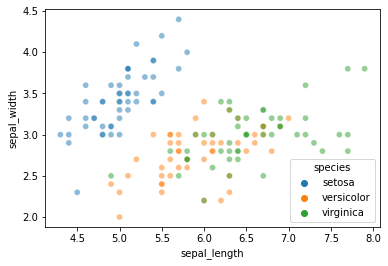

In [17]:
sns.scatterplot(data = iris, x = "sepal_length", y = "sepal_width", hue = "species", alpha = 0.5)
plt.show()

In [18]:
### YOUR CODE HERE





## Closing thoughts

In the above, we showed how the $k$-nearest neighbors classifier generates predictions for classifying novel data.

Next week, we'll look at other solutions to this problem and how to compare them.

But first, we need to cover an important question for *any* classifier: how do we evaluate the output to determine whether it did a good job (or, e.g., choose the best $k$ value)?

This is what we'll discuss on Friday!